#### Glaciers analysis
The Randolph Glacier Inventory (RGI) version 7.0 glaicer data is acquired for analysis. and the detailed information is in: https://www.glims.org/rgi_user_guide/welcome.html


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import geopandas as gpd
from pyogrio import read_dataframe   ### faster when reading vector data by using geopandas
from glob import glob
from utils.utils import add_basemap


In [2]:
dir_glaciers = 'data/glaciers/rgi70'
paths_glacier = glob(dir_glaciers+'/*.gpkg')
proj = ccrs.PlateCarree()


In [16]:
glaciers_gpd = [read_dataframe(path) for path in paths_glacier]
glaciers_gpd = pd.concat(glaciers_gpd, ignore_index=True)
print(len(glaciers_gpd))
print(glaciers_gpd.keys())
glaciers_gpd.head(5)


274531
Index(['rgi_id', 'o1region', 'o2region', 'glims_id', 'anlys_id', 'subm_id',
       'src_date', 'cenlon', 'cenlat', 'utm_zone', 'area_km2', 'primeclass',
       'conn_lvl', 'surge_type', 'term_type', 'glac_name', 'is_rgi6',
       'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m',
       'slope_deg', 'aspect_deg', 'aspect_sec', 'dem_source', 'lmax_m',
       'geometry'],
      dtype='object')


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
0,RGI2000-v7.0-G-14-00001,14,14-01,G067620E34655N,804535,752,2002-07-10T00:00:00,67.620202,34.654905,42,...,4536.7124,4676.8003,4603.5283,4603.8594,26.948929,37.688797,2.0,COPDEM30,366,"MULTIPOLYGON Z (((67.61833 34.65505 0.00000, 6..."
1,RGI2000-v7.0-G-14-00002,14,14-01,G067622E34651N,804537,752,2002-07-10T00:00:00,67.621905,34.651057,42,...,4638.7827,4804.8125,4717.5600,4717.8677,32.964447,52.133255,2.0,COPDEM30,265,"MULTIPOLYGON Z (((67.62345 34.65158 0.00000, 6..."
2,RGI2000-v7.0-G-14-00003,14,14-01,G067628E34649N,804541,752,2002-07-10T00:00:00,67.627775,34.649056,42,...,4365.1064,4679.7180,4466.4575,4474.7476,28.838598,51.147680,2.0,COPDEM30,536,"MULTIPOLYGON Z (((67.62994 34.64941 0.00000, 6..."
3,RGI2000-v7.0-G-14-00004,14,14-01,G067631E34650N,804550,752,2002-07-10T00:00:00,67.632716,34.646673,42,...,4355.6200,4613.7207,4466.9556,4467.8600,18.512090,356.553575,1.0,COPDEM30,1040,"MULTIPOLYGON Z (((67.63643 34.64389 0.00000, 6..."
4,RGI2000-v7.0-G-14-00005,14,14-01,G067639E34654N,804560,752,2002-07-10T00:00:00,67.638960,34.654315,42,...,4330.1890,4459.2320,4376.4810,4382.6140,31.877573,6.774054,1.0,COPDEM30,258,"MULTIPOLYGON Z (((67.64024 34.65517 0.00000, 6..."


In [4]:
# ax = plt.axes(projection=proj)
# add_basemap(ax=ax)
# glaciers_gpd.plot(ax=ax, facecolor='hotpink')


Text(0.5, 0, 'glacier area (km2)')

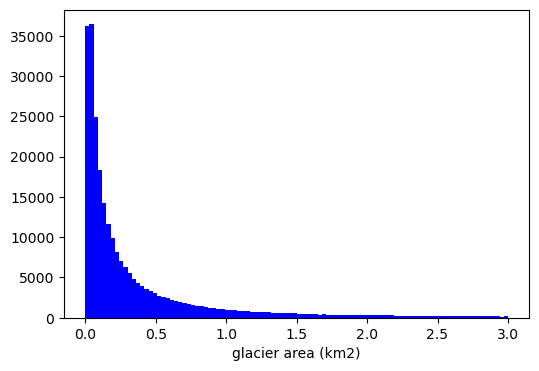

In [5]:
### histogram statistic for glacier area
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(glaciers_gpd['area_km2'], bins=100, facecolor='blue', range=[0, 3]);
ax.set_xlabel('glacier area (km2)')


Text(0.5, 0, 'glacier mean elevation (m)')

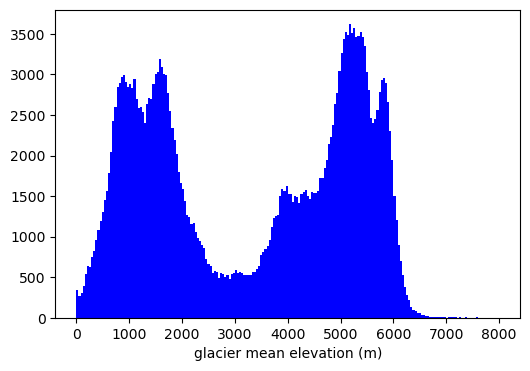

In [6]:
### histogram statistic for glacier elevation
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(glaciers_gpd['zmean_m'], bins=200, facecolor='blue', range=[0, 8000]);
ax.set_xlabel('glacier mean elevation (m)')


<GeoAxes: >

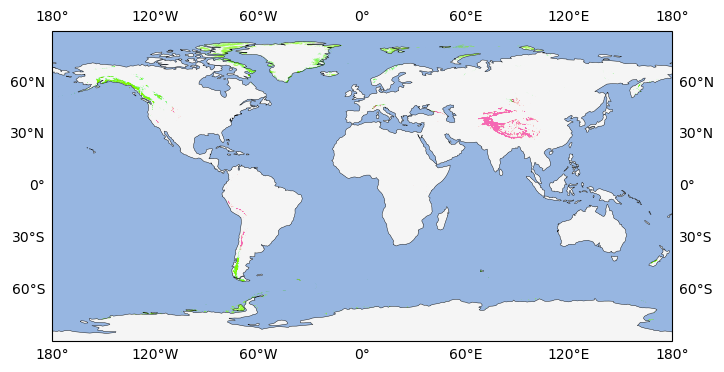

In [7]:
### compare the distribution of glaciers with elevation lager than 3000 with that smaller than 3000.
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
## mean elevation lager than 3000 m
ids_ele_lt3000 = np.where(glaciers_gpd['zmean_m']>3000)[0]
glaciers_gpd_ele_lt3000 = glaciers_gpd.loc[ids_ele_lt3000,:]
## mean elevation smaller than 3000 m
ids_ele_se3000 = np.where(glaciers_gpd['zmean_m']<=3000)[0]
glaciers_gpd_ele_se3000 = glaciers_gpd.loc[ids_ele_se3000,:]
glaciers_gpd_ele_lt3000.plot(ax=ax, facecolor='hotpink')
glaciers_gpd_ele_se3000.plot(ax=ax, facecolor='chartreuse')


In [8]:
dict_regions = {'id': ['01','02','03','04','05','06','07','08','09','19','11',
                       '12','13','14','15','16','17','18','19','20'],
               'full_name': ['Alaska', 'Western_Canada_and_USA','Arctic_Canada_North','Arctic_Canada_South',
                             'Greenland_Periphery','Iceland','Svalbard_and_Jan_Mayen','Scandinavia',
                             'Russian_Arctic','North_Asia','Central_Europe','Caucasus_and_Middle_East',
                             'Central_Asia','South_Asia_West','South_Asia_East','Low_Latitudes',
                             'Southern_Andes','New_Zealand','Subantarctic_and_Antarctic_Islands',
                             'Antarctic_Mainland']}


In [9]:
area_regions = []
num_regions = []
for region_id in dict_regions['id']:
    ids_region = np.where(glaciers_gpd['o1region']==region_id)[0]
    glaciers_region = glaciers_gpd.loc[ids_region,:]  
    area_regions.append(glaciers_region['area_km2'].sum())
    num_regions.append(len(glaciers_region))
dict_regions['area'] = area_regions
dict_regions['num'] = num_regions


In [10]:
glacier_region_pd = pd.DataFrame(data=dict_regions)
glacier_region_pd.head()

,id,full_name,area,num
0,01,Alaska,86707.624176,27509
1,02,Western_Canada_and_USA,14521.473146,18730
2,03,Arctic_Canada_North,105370.271738,5216
3,04,Arctic_Canada_South,40538.078733,11009
4,05,Greenland_Periphery,90481.598806,19994


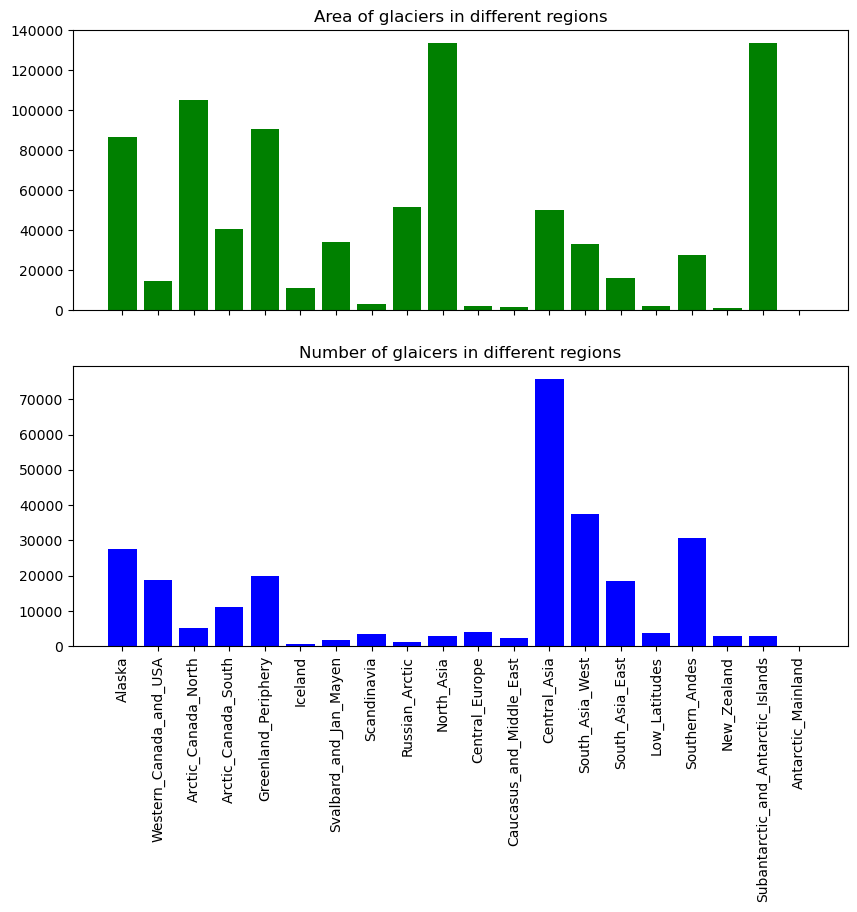

In [11]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10,8))
x_ticks = np.linspace(1,20,20)
ax[0].bar(x_ticks, glacier_region_pd['area'], color='green')
ax[0].set_title('Area of glaciers in different regions')
ax[1].bar(x_ticks, glacier_region_pd['num'], color='blue')
ax[1].set_xticks(ticks=x_ticks, labels=glacier_region_pd['full_name'])
ax[1].set_title('Number of glaicers in different regions')
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)


1. quantity and area

In [12]:
area_total = glaciers_gpd['area_km2'].sum()
area_max = glaciers_gpd['area_km2'].max()
area_min = glaciers_gpd['area_km2'].min()
## The total quantity of glaicers.  
print('Number of the glaciers:', len(glaciers_gpd))
## The total area （unit：km2）
print('Area of all the glaciers:', area_total)
## The area of the largest and smallest glaicers. 
print('The areas of the largest and smallest glaicers: %.2fkm2, %.2fkm2' % (area_max, area_min))



Number of the glaciers: 274531
Area of all the glaciers: 706744.0494672467
The areas of the largest and smallest glaicers: 5260.71km2, 0.01km2


2. Lakes selection   
2.1 select the lakes with area lager than 1 km2.


In [13]:
### Lakes selection: lakes larger than 1km2
ids_le_1 = np.where(glaciers_gpd['area_km2']>1)[0]
percent_area_le1 = glaciers_gpd['area_km2'][ids_le_1].sum()/glaciers_gpd['area_km2'].sum()
percent_num_le1 = ids_le_1.shape[0]/len(glaciers_gpd)
print('Number of glaciers larger than 1km2:', ids_le_1.shape[0])
print('Number percentage of selected glaciers: %.2f%%' % (percent_num_le1*100) )
print('Area percentage of selected glaciers: %.2f%%' % (percent_area_le1*100) )


Number of glaciers larger than 1km2: 44905
Number percentage of selected glaciers: 16.36%
Area percentage of selected glaciers: 93.15%


In [14]:
### Select glaciers with area lager than 1 km2
glaciers_gpd_sel = glaciers_gpd.loc[ids_le_1,:]
glaciers_gpd_sel.head()


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
107,RGI2000-v7.0-G-14-00108,14,14-01,G069592E35483N,806289,752,2002-07-10T00:00:00,69.590228,35.482222,42,...,4105.4307,4987.6826,4424.0522,4479.4087,25.105888,354.966441,1.0,COPDEM30,2927,"MULTIPOLYGON Z (((69.58672 35.48931 0.00000, 6..."
375,RGI2000-v7.0-G-14-00376,14,14-01,G070188E35934N,807497,752,2002-07-10T00:00:00,70.188308,35.934503,42,...,4722.1934,5365.0050,4894.7183,4928.4980,23.452744,352.212048,1.0,COPDEM30,1644,"MULTIPOLYGON Z (((70.18083 35.93186 0.00000, 7..."
391,RGI2000-v7.0-G-14-00392,14,14-01,G070169E35926N,807444,752,2002-07-10T00:00:00,70.167522,35.925183,42,...,4759.2427,5452.8276,5018.3710,5035.5140,24.518820,317.463711,8.0,COPDEM30,2320,"MULTIPOLYGON Z (((70.16378 35.92892 0.00000, 7..."
449,RGI2000-v7.0-G-14-00450,14,14-01,G070240E35674N,807643,752,2002-07-10T00:00:00,70.246120,35.669541,42,...,4434.7350,5329.4390,4641.3710,4674.5680,21.807407,338.218750,1.0,COPDEM30,2097,"MULTIPOLYGON Z (((70.23720 35.67055 0.00000, 7..."
470,RGI2000-v7.0-G-14-00471,14,14-01,G070174E35598N,807452,752,2002-07-10T00:00:00,70.171964,35.597223,42,...,4392.7240,5022.7314,4783.6714,4762.2500,17.871569,33.145992,2.0,COPDEM30,2059,"MULTIPOLYGON Z (((70.16143 35.59291 0.00000, 7..."


<GeoAxes: >

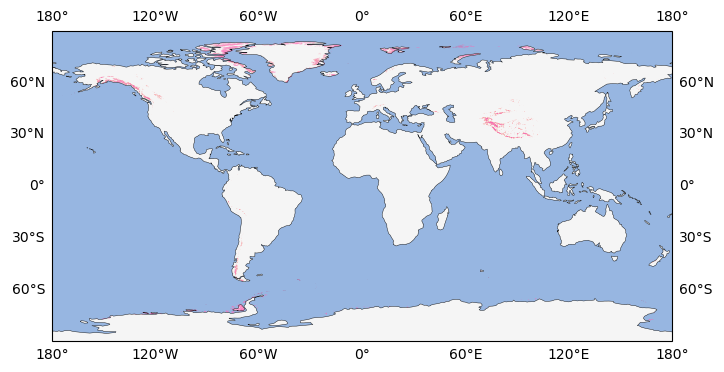

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
glaciers_gpd_sel.plot(ax=ax, facecolor='hotpink')
